Statistics coded: Tourism Statistics

Prepared by Sarah Hadj Hassen.

In [ ]:
#install.packages(c("ggplot2", "plotly", "tidyr", "repr", "dplyr", "devtools", "restatapi"))
#install.packages("eurostat")
#install.packages("patchwork")
#install.packages("Matching")

library(ggplot2)
library(tidyr)
library(dplyr)
library(eurostat)
library(Matching)
library(stats)

create first graph

In [ ]:
## tourism destinations - nights spent at toursit accommondation establishments, 2018

data <- get_eurostat(id="tour_occ_ninat")
nrow(data)

# first check whether all countries needed and create countries vector
countr <- c("ES","IT","FR","EL","AT","DE","HR","PT","NL","CZ","BE","BG","PL","IE","CY","SE","HU","DK","SI",
                         "MT","FI","SK","RO","EE","LV","LT","LU","UK","CH","NO","IS","LI","TR","ME","RS","MK","XK")
levels(data$geo)
levels(data$c_resid)
levels(data$nace_r2)

In [ ]:
# for Ireland, Slovenia, United Kingdom, Switzerland, Norway, Iceland, Montenegro, Serbia and Kosovo we need 2018 monthly data
data_month <- get_eurostat(id="tour_occ_nim")
nrow(data_month)

data_month$year <- as.integer(substr(data_month$time,1,4))
data_month$month <- as.integer(substr(data_month$time,6,7))

countr2 <- c("IE","SI","UK","CH","NO","IS","ME","RS","XK")

data_mod <- subset(data_month, 
                    data_month$geo %in% countr2 & 
                    data_month$year==2018 &
                    data_month$c_resid=="FOR" &
                    data_month$nace_r2=="I551-I553"&
                    data_month$unit=="NR")

nrow(data_mod)
levels(data_mod$geo)

data_mod1 <- aggregate(data_mod$values, by = list(geo = data_mod$geo), FUN = sum)
names(data_mod1)[2] <- "values"

In [ ]:
# building needed subset for the other countries
data$year <- as.integer(substr(data$time,1,4))
head(data)

data_mod2 <- subset(data, 
                    data$geo %in% countr & 
                    data$year==2018 &
                    data$c_resid=="FOR" &
                    data$nace_r2=="I551-I553"&
                    data$unit=="NR")
nrow(data_mod2)
data_mod2 <- data_mod2[,c(4,6)]
data_mod2

In [ ]:
# for Turkey we need data from 2016
countr3 <- c("TR")

data_mod3 <- subset(data, 
                    data$geo %in% countr3 & 
                    data$year==2016 &
                    data$c_resid=="FOR" &
                    data$nace_r2=="I551-I553"&
                    data$unit=="NR")
data_mod3 <- data_mod3[,c(4,6)]
data_mod3  

In [ ]:
#match data_mod1 and data_mod2 and data_mod3
data_mod4 <- rbind(data_mod1,data_mod2,data_mod3)
data_mod4

In [ ]:
# bring the country names in the order the grpahik shows
data_mod4$geo <- factor(data_mod4$geo,
                        levels = c("ES","IT","FR","EL","AT","DE","HR","PT","NL","CZ","BE","BG","PL","IE","CY","SE","HU",
                                   "DK","SI", "MT","FI","SK","RO","EE","LV","LT","LU","UK","CH","NO","IS","LI","TR","ME",
                                   "RS","MK","XK"))
data_mod4

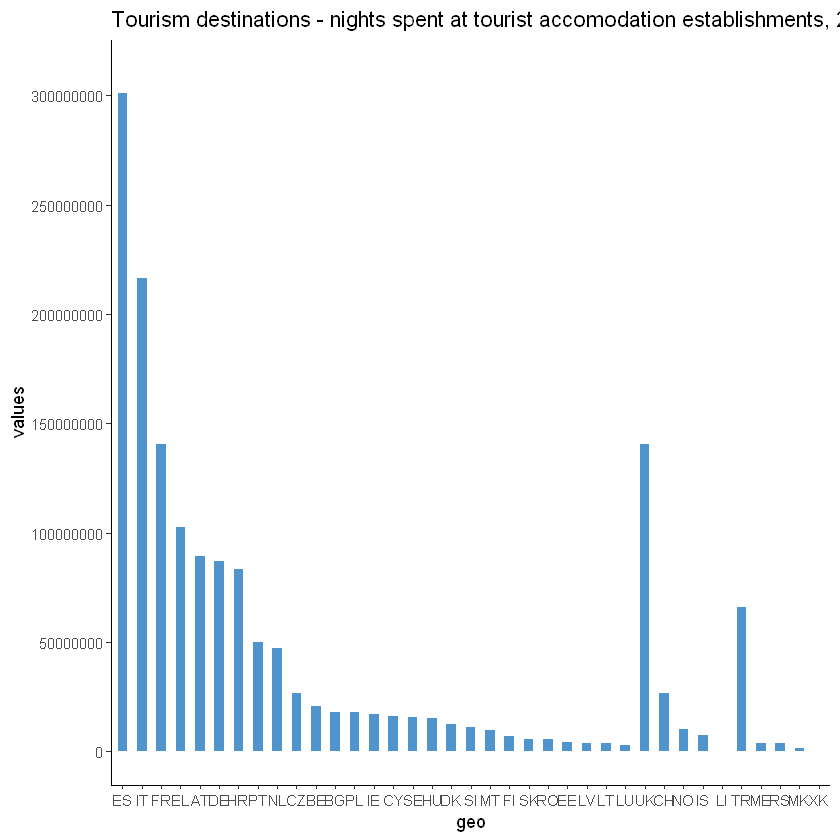

In [56]:
options(scipen=999)
ggplot(data_mod4, aes(x=geo,y=values)) +
            geom_bar(stat = "identity", position="dodge", width=0.5, fill="steelblue3") +
            theme_classic() +
            scale_y_continuous(limits = c(0, 310000000), breaks = seq(0, 300000000, by = 50000000)) +
            ggtitle("Tourism destinations - nights spent at tourist accomodation establishments, 2018")

create first table

In [ ]:
## tourist accomodation establishments, 2018

# we need 3 datasets for each column
countr_0 <- c("BE","BG","CZ","DK","DE","EE","IE","EL","ES","FR","HR","IT","CY","LV","LT","LU","HU","MT","NL",
              "AT","PL","PT","RO","SI","SK","FI","SE","UK","IS","LI","NO","CH","ME","MK","RS","TR","XK")

In [ ]:
# column 1: number of establishments (units)
data_1 <- get_eurostat(id="tour_cap_nat")

data_1$year <- as.integer(substr(data_1$time,1,4))

levels(data_1$geo)
levels(data_1$nace_r2)
levels(data_1$unit)
levels(data_1$accommod)

# exclude the countries, which need data from 2016 and 2017
countr_1 <- c("BE","BG","CZ","DK","DE","EE","EL","ES","FR","HR","IT","CY","LV","LT","HU","MT","NL",
                         "AT","PL","PT","RO","SK","FI","SE","IS","LI","NO","CH","ME","MK","RS")
data_tab1 <- subset(data_1, 
                    data_1$geo %in% countr_1 & 
                    data_1$year==2018 &
                    data_1$nace_r2=="I551-I553"&
                    data_1$unit=="NR"&
                    data_1$accommod=="ESTBL")
data_tab1 <- data_tab1[,c(4,6)]

# for Ireland and United Kingdom we need data from 2016
countr_1_1 <- c("IE","UK")
data_tab1_1 <- subset(data_1, 
                      data_1$geo %in% countr_1_1 & 
                      data_1$year==2016 &
                      data_1$nace_r2=="I551-I553"&
                      data_1$unit=="NR"&
                      data_1$accommod=="ESTBL")
data_tab1_1 <- data_tab1_1[,c(4,6)]

# for Luxembourg, Slovenia and Kosovo we need data from 2017
countr_1_2 <- c("LU","SI","XK")
data_tab1_2 <- subset(data_1, 
                      data_1$geo %in% countr_1_2 & 
                      data_1$year==2017 &
                      data_1$nace_r2=="I551-I553"&
                      data_1$unit=="NR"&
                      data_1$accommod=="ESTBL")
data_tab1_2 <- data_tab1_2[,c(4,6)]

# for Turkey we have NA
data_tab1_3 <- data.frame( geo = "TR", values=  NA)

#matching
data_tab_col1 <- rbind(data_tab1,data_tab1_1,data_tab1_2,data_tab1_3)

# bring the country names in the order the grpahik shows
data_tab_col1 <- data_tab_col1[order(factor(data_tab_col1$geo, levels= countr_0)),]
data_tab_col1

In [ ]:
# column 2: number of bed places (thousands)

# exclude the countries, which need data from 2016 and 2017
countr_2 <- c("BE","BG","CZ","DK","DE","EE","EL","ES","FR","HR","IT","CY","LV","LT","HU","MT","NL",
                         "AT","PL","PT","RO","SK","FI","SE","IS","LI","NO","CH","ME","MK","RS","TR")
data_tab2 <- subset(data_1, 
                    data_1$geo %in% countr_2 & 
                    data_1$year==2018 &
                    data_1$nace_r2=="I551-I553"&
                    data_1$unit=="NR"&
                    data_1$accommod=="BEDPL")
data_tab2 <- data_tab2[,c(4,6)]

# for Ireland and United Kingdom we need data from 2016
countr_2_1 <- c("IE","UK")
data_tab2_1 <- subset(data_1, 
                      data_1$geo %in% countr_2_1 & 
                      data_1$year==2016 &
                      data_1$nace_r2=="I551-I553"&
                      data_1$unit=="NR"&
                      data_1$accommod=="BEDPL")
data_tab2_1 <- data_tab2_1[,c(4,6)]

# for Luxembourg, Slovenia and Kosovo we need data from 2017
countr_2_2 <- c("LU","SI","XK")
data_tab2_2 <- subset(data_1, 
                      data_1$geo %in% countr_1_2 & 
                      data_1$year==2017 &
                      data_1$nace_r2=="I551-I553"&
                      data_1$unit=="NR"&
                      data_1$accommod=="BEDPL")
data_tab2_2 <- data_tab2_2[,c(4,6)]

# for Turkey we have NA
data_tab2_3 <- data.frame( geo = "TR", values=  NA)

#matching
data_tab_col2 <- rbind(data_tab2,data_tab2_1,data_tab2_2,data_tab2_3)

# bring the country names in the order the grpahik shows
data_tab_col2 <- data_tab_col2[order(factor(data_tab_col2$geo, levels= countr_0)),]
data_tab_col2

In [ ]:
# column 3: nights spent by residents and non-residents (millions)

# we already load the data for the graph before
# exclude the countries, which need data from 2016 and monthly from 2018
countr_3 <- c("BE","BG","CZ","DK","DE","EE","EL","ES","FR","HR","IT","CY","LV","LT","LU","HU","MT","NL",
                         "AT","PL","PT","RO","SK","FI","SE","LI","MK")
data_tab3 <- subset(data, 
                    data$geo %in% countr_3 & 
                    data$year==2018 &
                    data$c_resid=="TOTAL" &
                    data$nace_r2=="I551-I553"&
                    data$unit=="NR")

data_tab3 <- data_tab3[,c(4,6)]

# for Ireland, Slovenia, United Kingdom, Switzerland, Norway, Iceland, Montenegro, Serbia and Kosovo we need 2018 monthly data
# we already load the data for the graph before
countr_3_1 <- c("IE","SI","UK","CH","NO","IS","ME","RS","XK")

data_tab3_1 <- subset(data_month, 
                    data_month$geo %in% countr_3_1 & 
                    data_month$year==2018 &
                    data_month$c_resid=="TOTAL" &
                    data_month$nace_r2=="I551-I553"&
                    data_month$unit=="NR")

data_tab3_1 <- aggregate(data_tab3_1$values, by = list(geo = data_tab3_1$geo), FUN = sum)
names(data_tab3_1)[2] <- "values"

# for Turkey we need data from 2016
countr_3_2 <- c("TR")

data_tab3_2 <- subset(data, 
                      data$geo %in% countr_3_2 & 
                      data$year==2016 &
                      data$c_resid=="TOTAL" &
                      data$nace_r2=="I551-I553"&
                      data$unit=="NR")
data_tab3_2 <- data_tab3_2[,c(4,6)]
 

#matching
data_tab_col3 <- rbind(data_tab3,data_tab3_1,data_tab3_2)

# bring the country names in the order the grpahik shows
data_tab_col3 <- data_tab_col3[order(factor(data_tab_col3$geo, levels= countr_0)),]
data_tab_col3

In [ ]:
# create column with the names of the countries
countr_names <- c("Belgium","Bulgaria","Czechia","Denmark","Germany","Estonia", "Ireland", "Greece", "Spain", "France", 
                  "Croatia", "Italy", "Cyprus", "Latvia", "Lithuania", "Luxembourg", "Hungary", "Malta", "Netherlands", 
                  "Austria", "Poland", "Portugal", "Romania", "Slovenia", "Slovakia", "Finland", "Sweden",
                 "United Kingdom", "Iceland", "Liechtenstein", "Norway", "Switzerland", "Montenegro", "North Macedonia", 
                  "Serbia", "Turkey", "Kosovo")

nrow(data_tab_col1)
nrow(data_tab_col2)
nrow(data_tab_col3)

# matching all columns together
table <- cbind(countr_names, data_tab_col1[,2], data_tab_col2[,2], data_tab_col3[,2])
table

In [57]:
# calculate the EU-27 value by summing up
EU_27 <- c("AT","BE", "BG","HR","CY", "CZ","DK", "DE", "EE","FI","FR","EL","HU","IE",
           "IT","LV","LT","LU","MT","NL","PL","PT","RO","SK","SI","ES","SE")
# we need the table from above with shortcuts instead of full names to exclude the not-EU countriesdata with the EU_27 vector
tab_prep <- cbind(countr_0,data_tab_col1[,2], data_tab_col2[,2], data_tab_col3[,2])

EU_27_prep <- tab_prep$countr_0 %in% EU_27

tab_EU <- c("EU-27",sapply(table[EU_27_prep,2:4],sum))                
tab_EU

# put the summarized values to the calculated table from above

table_final <- rbind(tab_EU,table)
table_final

values     values.1     values.2 
     "EU-27"     "600157"   "28293931" "2791211461"

Warning message in `[<-.factor`(`*tmp*`, ri, value = "EU-27"):
"invalid factor level, NA generated"

countr_names,values,values,values
<fct>,<chr>,<chr>,<chr>
NA,600157,28293931,2791211461
Belgium,9211,389826,41320284
Bulgaria,3458,335597,26845013
Czechia,9426,741235,55513922
Denmark,1167,426075,33280395
Germany,50020,3473630,419556284
Estonia,1535,61193,6630315
Ireland,3145,199756,33382184
Greece,38180,1340451,123087178


create figure 2

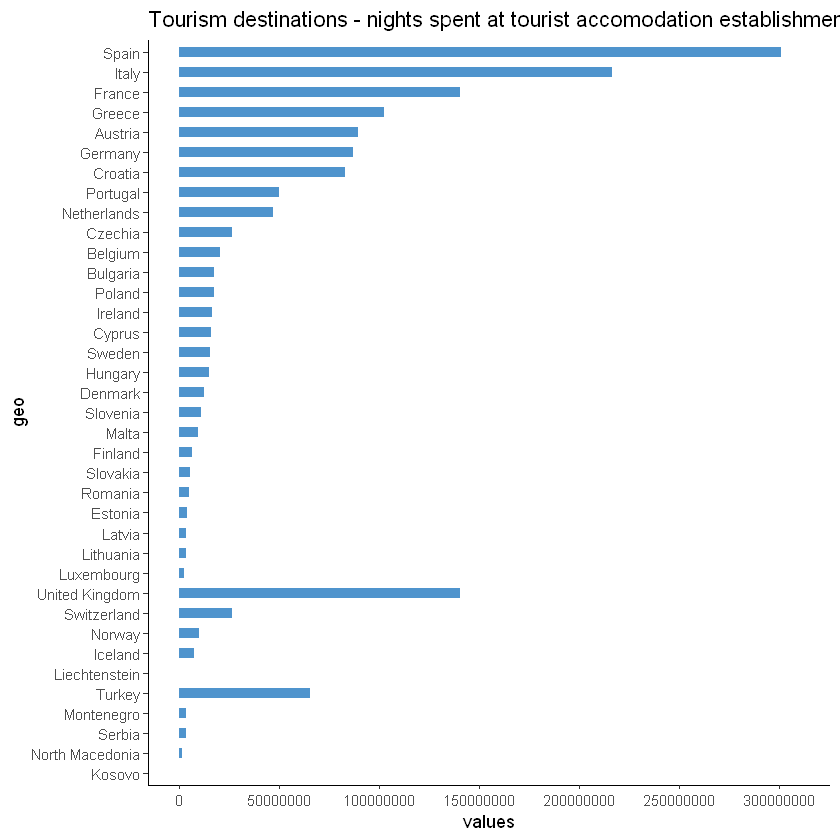

In [58]:
ggplot(data_mod4, aes(x=geo,y=values)) +
            geom_bar(stat = "identity", position="dodge", width=0.5, fill="steelblue3") +
            theme_classic() +
            scale_y_continuous(limits = c(0, 310000000), breaks = seq(0, 300000000, by = 50000000)) +
            ggtitle("Tourism destinations - nights spent at tourist accomodation establishments, 2018") +
            coord_flip() +
            scale_x_discrete(limits = rev(levels(data_mod4$geo)),
                             labels = c("Kosovo", "North Macedonia", "Serbia", "Montenegro", "Turkey", "Liechtenstein", 
                                        "Iceland", "Norway", "Switzerland", "United Kingdom", "Luxembourg", "Lithuania", 
                                        "Latvia", "Estonia", "Romania", "Slovakia", "Finland", "Malta", "Slovenia", 
                                        "Denmark", "Hungary", "Sweden", "Cyprus", "Ireland", "Poland", "Bulgaria", 
                                        "Belgium", "Czechia", "Netherlands", "Portugal", "Croatia", "Germany", "Austria", 
                                        "Greece", "France", "Italy", "Spain"))

create figure 4

In [ ]:
### we already load the dataset and can use the values from the third colomn from table 1
bev <- get_eurostat(id="demo_gind")

bev_subs <- subset(bev, 
                   bev$geo %in% countr & 
                   bev$indic_de=="JAN" &
                   bev$time=="2018-01-01")
bev_subs2 <- bev_subs[,c(2,4)]

# bring the country names in the same order like the table above to add the columns with the tourist accomodation
bev_subs2 <- bev_subs2[order(factor(bev_subs2$geo, levels= countr_0)),]
bev_subs2 <- cbind(bev_subs2,data_tab_col3)
# add the ratio-column
bev_subs2 <- cbind(bev_subs2,bev_subs2[,4]/bev_subs2[,2])
names(bev_subs2)[5] <- "values"
bev_subs2

# create new country vector to bring the countries in the right order
countr_fig4 <- c("HR", "MT","CY","AT","EL","ES","SI","PT","IT","IE","NL","FR","SE","DK","CZ","DE","EE","LU","FI","BG",
                 "BE","HU","LT","SK","LV","PL","RO", "UK", "IS","CH","NO","LI","ME","TR","RS","MK","XK")
bev_subs3 <- bev_subs2[,c(1,5)]
bev_subs3 <- bev_subs3[order(factor(bev_subs3$geo, levels= countr_fig4)),]
bev_subs3$geo <- factor(bev_subs3$geo,
                        levels = c("HR", "MT","CY","AT","EL","ES","SI","PT","IT","IE","NL","FR","SE","DK","CZ","DE",
                                   "EE","LU","FI","BG","BE","HU","LT","SK","LV","PL","RO", "UK", "IS","CH","NO","LI",
                                   "ME","TR","RS","MK","XK"))

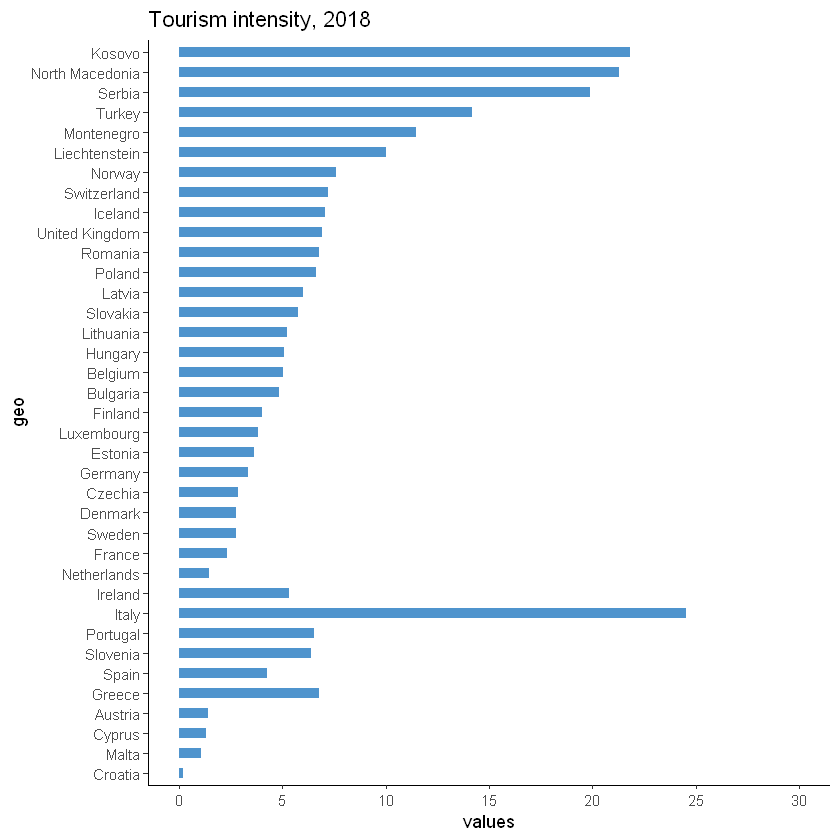

In [59]:
ggplot(bev_subs3, aes(x=geo,y=values)) +
            geom_bar(stat = "identity", position="dodge", width=0.5, fill="steelblue3") +
            theme_classic() +
            scale_y_continuous(limits = c(0, 30), breaks = seq(0, 30, by = 5)) +
            ggtitle("Tourism intensity, 2018") +
            coord_flip() +
            scale_x_discrete(limits = rev(levels(bev_subs3$geo)),
                             labels = c("Croatia", "Malta", "Cyprus", "Austria", "Greece", "Spain", "Slovenia", 
                                        "Portugal", "Italy", "Ireland", "Netherlands", "France", "Sweden", "Denmark", 
                                        "Czechia", "Germany", "Estonia", "Luxembourg", "Finland", "Bulgaria", "Belgium",
                                        "Hungary", "Lithuania", "Slovakia", "Latvia", "Poland", "Romania", "United Kingdom",
                                        "Iceland", "Switzerland", "Norway", "Liechtenstein", "Montenegro", "Turkey", 
                                        "Serbia", "North Macedonia", "Kosovo"))